In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/advertising.csv


In [107]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import csv 
import matplotlib.pyplot as plt

import pickle
import random
from keras.layers import Concatenate, concatenate
from keras.layers.normalization import BatchNormalization
import h5py
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [108]:
df = pd.read_csv("../input/advertising.csv")
print(df.head(5))

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

In [109]:
list(df.columns)

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Ad Topic Line',
 'City',
 'Male',
 'Country',
 'Timestamp',
 'Clicked on Ad']

In [110]:
df.drop(['City', 'Country','Timestamp'], axis = 1, inplace=True) 

In [111]:
list(df.columns)

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Ad Topic Line',
 'Male',
 'Clicked on Ad']

In [112]:
uni = df['Ad Topic Line'].unique()
dictionary = {}
for i in range(len(uni)):
    dictionary[uni[i]] = i
print(df['Ad Topic Line'].head(20))

0                Cloned 5thgeneration orchestration
1                Monitored national standardization
2                  Organic bottom-line service-desk
3             Triple-buffered reciprocal time-frame
4                     Robust logistical utilization
5                   Sharable client-driven software
6                        Enhanced dedicated support
7                          Reactive local challenge
8                    Configurable coherent function
9                Mandatory homogeneous architecture
10                   Centralized neutral neural-net
11    Team-oriented grid-enabled Local Area Network
12            Centralized content-based focus group
13                 Synergistic fresh-thinking array
14                    Grass-roots coherent extranet
15               Persistent demand-driven interface
16               Customizable multi-tasking website
17                       Intuitive dynamic attitude
18     Grass-roots solution-oriented conglomeration
19          

In [113]:
df['Ad Topic Line'].replace(dictionary, inplace=True)

In [114]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0,0
1,80.23,31,68441.85,193.77,1,1,0
2,69.47,26,59785.94,236.50,2,0,0
3,74.15,29,54806.18,245.89,3,1,0
4,68.37,35,73889.99,225.58,4,0,0
5,59.99,23,59761.56,226.74,5,1,0
6,88.91,33,53852.85,208.36,6,0,0
7,66.00,48,24593.33,131.76,7,1,1
8,74.53,30,68862.00,221.51,8,1,0
9,69.88,20,55642.32,183.82,9,1,0


In [115]:
list(df.columns)

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Ad Topic Line',
 'Male',
 'Clicked on Ad']

In [116]:
data = df.values
X = data[:,0:6]
Y = data[:,6]
print(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.

In [117]:
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_shape=(6,)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19651 (Dense)          (None, 12)                84        
_________________________________________________________________
dense_19652 (Dense)          (None, 1)                 13        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.compile( optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'] )
hist = model.fit(X_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
750/750 [==============================] - 0s 432us/step - loss: 0.6961 - accuracy: 0.4747
Epoch 2/10
750/750 [==============================] - 0s 315us/step - loss: 0.6942 - accuracy: 0.5120
Epoch 3/10
750/750 [==============================] - 0s 314us/step - loss: 0.6947 - accuracy: 0.4907
Epoch 4/10
750/750 [==============================] - 0s 315us/step - loss: 0.6947 - accuracy: 0.4880
Epoch 5/10
750/750 [==============================] - 0s 308us/step - loss: 0.6951 - accuracy: 0.4827
Epoch 6/10
750/750 [==============================] - 0s 311us/step - loss: 0.6945 - accuracy: 0.4960
Epoch 7/10
750/750 [==============================] - 0s 303us/step - loss: 0.6948 - accuracy: 0.4880
Epoch 8/10
750/750 [==============================] - 0s 322us/step - loss: 0.6939 - accuracy: 0.4907
Epoch 9/10
750/750 [==============================] - 0s 312us/step - loss: 0.6953 - accuracy: 0.5013
Epoch 10/10
750/750 [==============================] - 0s 316us/step - loss: 0.694

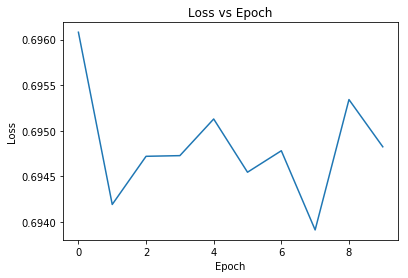

In [119]:
plt.plot(hist.history['loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [120]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)
print('\n Test loss: ', test_loss)


Test accuracy: 0.47999998927116394

 Test loss:  0.6937878718376159


In [121]:
#GA
class GeneticNeuralNetwork(Sequential):
    # Constructor
    def __init__(self, child_weights=None):
        # Initialize Sequential Model Super Class
        super().__init__()
        # If no weights provided randomly generate them
        if child_weights is None:
            # Layers are created and randomly generated
            layer1 = Dense(12, input_shape=(6,), activation='sigmoid')
            layer2 = Dense(1, activation='sigmoid')
            # Layers are added to the model
            self.add(layer1)
            self.add(layer2)
        # If weights are provided set them within the layers
        else:
            # Set weights within the layers
            self.add(
                Dense(
                    12,
                    input_shape=(6,),
                    activation='sigmoid',
                    weights=[child_weights[0], np.zeros(12)])
                )
            self.add(
                Dense(
                 1,
                 activation='sigmoid',
                 weights=[child_weights[1], np.zeros(1)])
            )

    # Function for forward propagating a row vector of a matrix
    def forward_propagation(self, X_train, y_train):
        # Forward propagation
        ########3
        y_hat = self.predict(X_train)
        # Compute fitness score
        self.fitness = accuracy_score(y_train, y_hat.round())

    # Standard Backpropagation
    def compile_train(self, epochs):
        self.compile(
                      optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy']
                      )
        #############
        self.fit(X_train, y_train, epochs=epochs)

In [122]:
# Chance to mutate weights
def mutation(child_weights):
    # Add a chance for random mutation
    selection = random.randint(0, len(child_weights)-1)
    mut = random.uniform(0, 1)
    if mut >= .7:
        child_weights[selection] *= random.randint(2, 5)
    else:
        # No mutation
        pass


# Crossover traits between two Genetic Neural Networks
def dynamic_crossover(nn1, nn2):
    # Lists for respective weights
    nn1_weights = []
    nn2_weights = []
    child_weights = []
    # Get all weights from all layers in the first network
    for layer in nn1.layers:
        nn1_weights.append(layer.get_weights()[0])

    # Get all weights from all layers in the second network
    for layer in nn2.layers:
        nn2_weights.append(layer.get_weights()[0])

    # Iterate through all weights from all layers for crossover
    for i in range(0, len(nn1_weights)):
        # Get single point to split the matrix in parents based on # of cols
        split = random.randint(0, np.shape(nn1_weights[i])[1]-1)
        # Iterate through after a single point and set the remaing cols to nn_2
        for j in range(split, np.shape(nn1_weights[i])[1]-1):
            nn1_weights[i][:, j] = nn2_weights[i][:, j]

        # After crossover add weights to child
        child_weights.append(nn1_weights[i])

    # Add a chance for mutation
    mutation(child_weights)

    # Create and return child object
    child = GeneticNeuralNetwork(child_weights)
    return child

In [ ]:
networks = []
pool = []
# Track Generations
generation = 0
# Initial Population
n = 25

# Generate n randomly weighted neural networks
for i in range(0, n):
    networks.append(GeneticNeuralNetwork())

# Cache Max Fitness
max_fitness = 0

# Max Fitness Weights
optimal_weights = []

# Evolution Loop
while (max_fitness < .75 and generation < 250):
    # Log the current generation
    generation += 1
    print('Generation: ', generation)

    # Forward propagate the neural networks to compute a fitness score
    for nn in networks:
        # Propagate to calculate fitness score
        nn.forward_propagation(X_train, y_train)
        # Add to pool after calculating fitness
        pool.append(nn)

    # Clear for propagation of next children
    networks.clear()

    # Sort based on fitness
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()

    # Find Max Fitness and Log Associated Weights
    for i in range(0, len(pool)):
        # If there is a new max fitness among the population
        if pool[i].fitness > max_fitness:
            max_fitness = pool[i].fitness
            print('Max Fitness: ', max_fitness)
            # Reset optimal_weights
            optimal_weights = []
            # Iterate through layers, get weights, and append to optimal
            for layer in pool[i].layers:
                optimal_weights.append(layer.get_weights()[0])
            print(optimal_weights)

    # Crossover, top 5 randomly select 2 partners for child
    for i in range(0, 5):
        for j in range(0, 2):
            # Create a child and add to networks
            temp = dynamic_crossover(pool[i], random.choice(pool))
            # Add to networks to calculate fitness score next iteration
            networks.append(temp)

# Create a Genetic Neural Network with optimal initial weights
gnn = GeneticNeuralNetwork(optimal_weights)
gnn.compile_train(10)

# Test the Genetic Neural Network Out of Sample
##############3
y_hat = gnn.predict(X_test)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_hat.round()))

Generation:  1
Max Fitness:  0.5066666666666667
[array([[-0.34266296, -0.05735642,  0.2949674 ,  0.35619187,  0.24185699,
        -0.1585857 , -0.50253457, -0.50767463,  0.4152962 , -0.16320166,
        -0.23603311, -0.14653432],
       [ 0.08193457, -0.18914807, -0.04464984,  0.15929377, -0.27522936,
         0.41743279,  0.09276509,  0.2678327 , -0.39433277,  0.45426404,
         0.04621965, -0.27124822],
       [ 0.24933475,  0.13205522,  0.54197025,  0.05535483, -0.0233565 ,
         0.20448953, -0.40544656,  0.37733328, -0.2879917 ,  0.35760856,
         0.14161068,  0.545225  ],
       [-0.5139705 ,  0.21842617, -0.40049386, -0.2898559 ,  0.12361723,
        -0.32893312,  0.21465468, -0.00470489, -0.53162754, -0.54044104,
        -0.00142646, -0.2537883 ],
       [ 0.23903996,  0.09782612, -0.42918503, -0.36903596,  0.46601605,
        -0.05221128, -0.4122801 , -0.19592643,  0.1989941 ,  0.01500714,
         0.5285251 ,  0.1451717 ],
       [-0.07035345, -0.22584239, -0.28771046,